문장의 유사도 측정

In [2]:
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
#min_df 단어장에 포함되기 위한 최소빈도(0~1)
vectorizer=CountVectorizer(min_df=1)

In [4]:
contents=["메리랑 놀러가고 싶지만 바쁜데 어떻하죠?",
         "메리는 공원에서 산책하고 노는 것을 싫어해요",
         "메리는 공원에서 노는 것도 싫어해요. 이상해요",
         "먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요"]

In [5]:
X=vectorizer.fit_transform(contents)
vectorizer.get_feature_names()

['것도',
 '것을',
 '곳으로',
 '공원에서',
 '그러질',
 '너무',
 '노는',
 '놀러가고',
 '떠나고',
 '메리는',
 '메리랑',
 '못하고',
 '바빠서',
 '바쁜데',
 '산책하고',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '여행을',
 '이상해요',
 '있어요']

In [8]:
X.toarray().transpose()

array([[0, 0, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [0, 1, 0, 0],
       [0, 1, 1, 0],
       [0, 0, 0, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 1]], dtype=int64)

In [9]:
X = vectorizer.fit_transform(contents)
num_samples, num_feature = X.shape
num_samples, num_feature

(4, 22)

In [34]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_vec = vectorizer.transform(new_post)
new_post_vec.toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]],
      dtype=int64)

In [35]:
import scipy as sp

def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())

In [37]:
best_doc=None
best_dist=65535
best_i=None

for i in range(0,num_samples):
    post_vec=X.getrow(i)

    d=dist_raw(post_vec,new_post_vec)
    print("==Post %i with dist=dist=%.2f  :%s" %(i,d,contents[i]))
    if d < best_dist:
        best_dist=d
        best_i=i

==Post 0 with dist=dist=2.45  :메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
==Post 1 with dist=dist=2.45  :메리는 공원에서 산책하고 노는 것을 싫어해요
==Post 2 with dist=dist=2.24  :메리는 공원에서 노는 것도 싫어해요. 이상해요
==Post 3 with dist=dist=3.00  :먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [38]:
from konlpy.tag import Twitter
t=Twitter()

C:\Users\A\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [39]:
contents_tokens=[t.morphs(row) for row in contents]
contents_tokens

[['메리', '랑', '놀러', '가고', '싶지만', '바쁜데', '어떻하죠', '?'],
 ['메리', '는', '공원', '에서', '산책', '하고', '노', '는', '것', '을', '싫어해요'],
 ['메리', '는', '공원', '에서', '노', '는', '것', '도', '싫어해요', '.', '이상해요'],
 ['먼',
  '곳',
  '으로',
  '여행',
  '을',
  '떠나고',
  '싶은데',
  '너무',
  '바빠서',
  '그러질',
  '못',
  '하고',
  '있어요']]

In [40]:
contents_for_vectorize=[]
for content in contents_tokens:
    sentence=""
    for word in content:
        sentence=sentence+" "+word
    contents_for_vectorize.append(sentence)
contents_for_vectorize

[' 메리 랑 놀러 가고 싶지만 바쁜데 어떻하죠 ?',
 ' 메리 는 공원 에서 산책 하고 노 는 것 을 싫어해요',
 ' 메리 는 공원 에서 노 는 것 도 싫어해요 . 이상해요',
 ' 먼 곳 으로 여행 을 떠나고 싶은데 너무 바빠서 그러질 못 하고 있어요']

In [41]:
X=vectorizer.fit_transform(contents_for_vectorize)
num_samples,num_features=X.shape
num_samples,num_features

(4, 20)

In [42]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_toekns=[t.morphs(row) for row in new_post]
new_post_for_vectorize=[]

for content in new_post_toekns:
    sentence=""
    for word in content:
        sentence=sentence+" "+word
    new_post_for_vectorize.append(sentence)
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [43]:
new_post_vec=vectorizer.transform(new_post_for_vectorize)

In [44]:
new_post_vec.toarray()

array([[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1]],
      dtype=int64)

In [45]:
def dist_raw(v1, v2):
    delta = v1 - v2
    return sp.linalg.norm(delta.toarray())


In [46]:
best_doc=None
best_dist=65535
best_i=None

for i in range(0,num_samples):
    post_vec=X.getrow(i)

    d=dist_raw(post_vec,new_post_vec)
    print("==Post %i with dist=dist=%.2f  :%s" %(i,d,contents[i]))
    if d < best_dist:
        best_dist=d
        best_i=i

==Post 0 with dist=dist=3.00  :메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
==Post 1 with dist=dist=1.00  :메리는 공원에서 산책하고 노는 것을 싫어해요
==Post 2 with dist=dist=2.00  :메리는 공원에서 노는 것도 싫어해요. 이상해요
==Post 3 with dist=dist=3.46  :먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요


In [47]:
print("Best post is %i,dist= %.2f"%(best_i,best_dist))
print("-->",new_post)
print("--->",contents[best_i])


Best post is 1,dist= 1.00
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [48]:
for i in range(0,len(contents)):
    print(X.getrow(i).toarray())
print("----------------------")
print(new_post_vec.toarray())

[[1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1]]
[[0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]]
[[0 0 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 0 1 1]]
----------------------
[[0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1]]


#bag of words
문장을 숫자로 표현하는 방법,출현빈도

In [49]:
def tfidf(t,d,D):
    tf=float(d.count(t))/sum(d.count(w) for w in set(d))
    idf=sp.log(float(len(D))/(len([doc for doc in D if t in doc])))
    return tf, idf

In [56]:
a,abb,abc=["a"],["a","b","b"],["a","b","c"]
D=[a,abb,abc]
print(tfidf("a",a,D))
print(tfidf("b",abb,D))#==>2/3  ln3/2
print(tfidf("a",abc,D))
print(tfidf("b",abc,D))
print(tfidf("c",abc,D))

(1.0, 0.0)
(0.6666666666666666, 0.4054651081081644)
(0.3333333333333333, 0.0)
(0.3333333333333333, 0.4054651081081644)
(0.3333333333333333, 1.0986122886681098)


In [58]:
def tfidf(t,d,D):
    tf=float(d.count(t))/sum(d.count(w) for w in set(d))
    idf=sp.log(float(len(D))/(len([doc for doc in D if t in doc])))
    return tf*idf

In [57]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer=TfidfVectorizer(min_df=1,decode_error="ignore")

In [59]:
contents_tokens=[t.morphs(row) for row in contents]
contents_for_vectorize=[]
for content in contents_tokens:
    sentence=""
    for word in content:
        sentence=sentence+" "+word
    contents_for_vectorize.append(sentence)
X=vectorizer.fit_transform(contents_for_vectorize)
num_samples,num_features=X.shape
num_samples,num_features

(4, 20)

In [60]:
vectorizer.get_feature_names()

['가고',
 '공원',
 '그러질',
 '너무',
 '놀러',
 '떠나고',
 '메리',
 '바빠서',
 '바쁜데',
 '산책',
 '싫어해요',
 '싶은데',
 '싶지만',
 '어떻하죠',
 '에서',
 '여행',
 '으로',
 '이상해요',
 '있어요',
 '하고']

In [61]:
new_post = ['메리랑 공원에서 산책하고 놀고 싶어요']
new_post_toekns=[t.morphs(row) for row in new_post]
new_post_for_vectorize=[]

for content in new_post_toekns:
    sentence=""
    for word in content:
        sentence=sentence+" "+word
    new_post_for_vectorize.append(sentence)
new_post_for_vectorize

[' 메리 랑 공원 에서 산책 하고 놀고 싶어요']

In [62]:
new_post_for_vectorize=vectorizer.transform(new_post_for_vectorize)

In [63]:
best_doc=None
best_dist=65535
best_i=None

for i in range(0,num_samples):
    post_vec=X.getrow(i)

    d=dist_raw(post_vec,new_post_vec)
    print("==Post %i with dist=dist=%.2f  :%s" %(i,d,contents[i]))
    if d < best_dist:
        best_dist=d
        best_i=i
print("Best post is %i,dist= %.2f"%(best_i,best_dist))
print("-->",new_post)
print("--->",contents[best_i])

==Post 0 with dist=dist=2.33  :메리랑 놀러가고 싶지만 바쁜데 어떻하죠?
==Post 1 with dist=dist=1.39  :메리는 공원에서 산책하고 노는 것을 싫어해요
==Post 2 with dist=dist=1.88  :메리는 공원에서 노는 것도 싫어해요. 이상해요
==Post 3 with dist=dist=2.34  :먼 곳으로 여행을 떠나고 싶은데 너무 바빠서 그러질 못하고 있어요
Best post is 1,dist= 1.39
--> ['메리랑 공원에서 산책하고 놀고 싶어요']
---> 메리는 공원에서 산책하고 노는 것을 싫어해요


In [64]:
#pip install gensim
import pandas as pd
import numpy as np
import gensim
from gensim.models import word2vec

In [65]:
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import platform
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~')
plt.rcParams["axes.unicode_minus"]=False

In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\A\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


In [88]:
#pip install selenium
from bs4 import BeautifulSoup
import requests
import time
from urllib.request import urlopen
import urllib

In [96]:
html="https://search.naver.com/search.naver?where=kid&sm=tab_jum&ie=utf8&query={key_word}&start={num}"

#html="https://kin.naver.com/search/list.nhn?query={key_word}&page={num}"
response=urlopen(html.format(num=1,key_word=urllib.parse.quote("여자 친구 선물")))
soup=BeautifulSoup(response,"html.parser")
tmp=soup.find_all("dl")

In [97]:
tmp_list=[]
for line in tmp:
    tmp_list.append(line.text)
tmp_list    

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 " 사탕보다 314배 나은20대 30대여자친구 선물 추천♥화이트데이 &... 2020.03.09. 30대 여자친구 선물로 좋은대중적인 향기들로 추천합니다 01 끌로에 노마드 오드퍼퓸 50ml / 129,000원상쾌한 로즈 플로럴 향과 우디 프래그런스가 우아하고 세련된...   뷰라보 라이프  공식  뷰디터's Beauty Wish List     명이 추천했습니다.  1  ",
 ' 싱그러운 향수를 찾고 있다면 #여자향수추천 #여자친구선물 2020.05.22.    록시땅코리아  공식  록시땅이 제안하는 선물 시리즈!     명이 추천했습니다.  0  ',
 ' 브라, 백, 향수, 헤어핀, 스니커 등 화이트데이 추천 여자친구 선... 2020.03.14. 꼭 기념일에만 선물을 하란 법은 없다. 그리고 꼭 비싼 선물을 해야 하는 법도 없다. 그저 마음이 들면, 주머니 사정이 맞는다면 그만. ...   하입비스트  공식  패션     명이 추천했습니다.  0  ',
 '  질문  여자친구 선물해주려구요   어제   여자친구가 첨으로 독립을 하게되서 축하기념으로 선물하려하는데요 여자친구 선물은 서프라이즈로 하고픈데 화장품이나 악세사리같은거는 제가 잘모르기도 하고 여자친구...   답변 여자친구 선물로 좀 특별한걸 선물해주세요 보면 생각이 자주나는걸로요 ㅎㅎ 아무래도 지속적이면서도 오래쓸수있는거겠죠 화장품은 소비성이니 비추천드려요!    닉네임찌누   ',
 '  질문  여자친구 선물 추천 부탁드려요~   2020.01.20.   저기요...여자친구 선물 추천 좀 해 주세요~ 너무 부담스럽지 않은 가벼운 종류로 찾고... 없이 좋아하면서도 실용적인 그런 종류로 괜찮은 여자친구 선물 

In [98]:
from tqdm import tqdm_notebook
present_candi_text=[]
for n in tqdm_notebook(range(1,1000,10)):
    response=urlopen(html.format(num=n, key_word=urllib.parse.quote("여자 친구 선물")))
    soup=BeautifulSoup(response,"html.parser")
    tmp=soup.find_all("dl")
    for line in tmp:
        present_candi_text.append(line.text)
    time.sleep(0.5)

In [99]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 " 사탕보다 314배 나은20대 30대여자친구 선물 추천♥화이트데이 &... 2020.03.09. 30대 여자친구 선물로 좋은대중적인 향기들로 추천합니다 01 끌로에 노마드 오드퍼퓸 50ml / 129,000원상쾌한 로즈 플로럴 향과 우디 프래그런스가 우아하고 세련된...   뷰라보 라이프  공식  뷰디터's Beauty Wish List     명이 추천했습니다.  1  ",
 ' 싱그러운 향수를 찾고 있다면 #여자향수추천 #여자친구선물 2020.05.22.    록시땅코리아  공식  록시땅이 제안하는 선물 시리즈!     명이 추천했습니다.  0  ',
 ' 브라, 백, 향수, 헤어핀, 스니커 등 화이트데이 추천 여자친구 선... 2020.03.14. 꼭 기념일에만 선물을 하란 법은 없다. 그리고 꼭 비싼 선물을 해야 하는 법도 없다. 그저 마음이 들면, 주머니 사정이 맞는다면 그만. ...   하입비스트  공식  패션     명이 추천했습니다.  0  ',
 '  질문  여자친구 선물해주려구요   어제   여자친구가 첨으로 독립을 하게되서 축하기념으로 선물하려하는데요 여자친구 선물은 서프라이즈로 하고픈데 화장품이나 악세사리같은거는 제가 잘모르기도 하고 여자친구...   답변 여자친구 선물로 좀 특별한걸 선물해주세요 보면 생각이 자주나는걸로요 ㅎㅎ 아무래도 지속적이면서도 오래쓸수있는거겠죠 화장품은 소비성이니 비추천드려요!    닉네임찌누   ',
 '  질문  여자친구 선물 추천 부탁드려요~   2020.01.20.   저기요...여자친구 선물 추천 좀 해 주세요~ 너무 부담스럽지 않은 가벼운 종류로 찾고... 없이 좋아하면서도 실용적인 그런 종류로 괜찮은 여자친구 선물 

In [100]:
import nltk
from konlpy.tag import Twitter; t=Twitter()

C:\Users\A\Anaconda3\lib\site-packages\konlpy\tag\_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


In [101]:
present_text=""
for each_line in present_candi_text[:10000]:
    present_text=present_text+each_line+"\n"

In [102]:
tokens_ko=t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '사탕',
 '보다',
 '314',
 '배',
 '나은',
 '20',
 '대',
 '30',
 '대',
 '여자친구',
 '선물',
 '추천',
 '♥',
 '화이트데이',
 '&...',
 '2020.03',
 '.',
 '09',
 '.',
 '30',
 '대',
 '여자친구',
 '선물',
 '로',
 '좋은',
 '대중',
 '적',
 '인',
 '향기',
 '들',
 '로',
 '추천',
 '합니다',
 '01',
 '끌로',
 '에',
 '노마드',
 '오드',
 '퍼퓸',
 '50',
 'ml',
 '/',
 '129,000원',
 '상쾌한',
 '로',
 '즈',
 '플',
 '로럴',
 '향',
 '과',
 '우디',
 '프래',
 '그런',
 '스',
 '가',
 '우아하고',
 '세련된',
 '...',
 '뷰',
 '라보',
 '라이프',
 '공식',
 '뷰디터',
 "'",
 's',
 'Beauty',
 'Wish',
 'List',
 '명',
 '이',
 '추천',
 '했습니다',
 '.',
 '1',
 '싱그러운',
 '향수',
 '를',
 '찾고',
 '있다면',
 '#여자향수추천',
 '#

In [109]:
ko=nltk.Text(tokens_ko,name="여자 친구 선물")
print(len(ko.tokens))
print(len(set(ko.tokens)))

119400
545


In [110]:
ko=nltk.Text(tokens_ko,"여자 친구 선물")
ko.vocab().most_common(100)

[('선물', 7500),
 ('여자친구', 5100),
 ('.', 4400),
 ('...', 3200),
 ('추천', 2400),
 ('로', 2100),
 ('가', 1600),
 ('대', 1600),
 ('이', 1600),
 ('을', 1500),
 ('에', 1300),
 ('검색', 1200),
 ('10', 900),
 (',', 800),
 ('여자', 800),
 ('(', 800),
 (')', 800),
 ('를', 700),
 ('는', 700),
 ('20', 700),
 ('내', 700),
 ('한', 600),
 ('하는', 600),
 ('좋은', 600),
 ('향기', 600),
 ('있는', 600),
 ('?', 600),
 ('단어', 500),
 ('된', 500),
 ('의', 500),
 ('30', 500),
 ('화이트데이', 500),
 ('!', 500),
 ('질문', 500),
 ('답변', 500),
 ('닉네임', 500),
 ('저', 500),
 ('수', 500),
 ('친구', 500),
 ('블로그', 500),
 ('/', 400),
 ('개', 400),
 ('적', 400),
 ('들', 400),
 ("'", 400),
 ('은', 400),
 ('으로', 400),
 ('도', 400),
 ('스킨', 400),
 ('****', 400),
 ('뭐', 400),
 ('생일', 400),
 ('입력', 300),
 ('할', 300),
 ('2020.03', 300),
 ('향', 300),
 ('그런', 300),
 ('공식', 300),
 ('명', 300),
 ('했습니다', 300),
 ('1', 300),
 ('향수', 300),
 ('찾고', 300),
 ('하고', 300),
 ('좀', 300),
 ('요', 300),
 ('ㅎㅎ', 300),
 ('오래', 300),
 ('~', 300),
 ('너무', 300),
 ('괜찮은', 300),
 ('사진', 300

In [111]:
stop_words = ['요', '이', '도', '\xa0', '을', '.', '에', ',', '은', '것', '좋', '가', '로', '..', '고', 
  '는', '면', '~', '거', '를', '다', '?', '괜찮', '주', '서', '니다', '에서', '수', '만', '지', '한', '있', 
 '시', '들', '있는', '나', '일', '는데', '되', '분', '저', '습니다', '같아', '라고', '제', '!', '까', '데요', 
 '했', '개', '인데', '아요', '의', '때', '랑', '어요', '입니', '있어', '전', '게', '많이', '합', '야', '같네',
 '아', '알', '아니', '줘', '속', '중', '다른', '다면', '같은', '건', '적', '드리', '세요', '같이', '라구요',
 '...', 'ㅎㅎ', '넣어', '안', '어서', '넣', '있구', '님', '1', '하고', '데', '거든요', '좀', '으로', '실', 
'라', '안녕하세', '이런', '어떨', '않', '사', '어떠', '해서', '드려', '까지', '보시', '던', '길', '날', 
'있으', '다고', '하는', '음', '대', '어떤', '정도', '이나', '면서', '않고', '었', '구요', '그냥', '등', 
'와', '에요', '네이버', '추천해', '하시', '인', '없고', '듯', '3', '이랑', '더라구요', '질문', '여', 
'글구', '등등', '보고', '2', '만든', '하세', '또는', '일단', '생각하시', '한번', '쯤', '될', '이에요', 
'넘', '해', '배송', '제품', '원', '챙겨', '잘', '줬', '~^^', '가지', '항상', '마다', '20', '하니', 
'없어', '스', '보다', '역시',  '또', '으', '두', '해보세', '뭘', '너무', '엄청', '니', ')', '예', '!!', '걸', 
'ㅠㅠ', '을까', '알려', '보니', '답변', '볼게', '곳', '예요', '혹시', 'D', '하면', '용', '으로도',
'자신', '들어가서', '엮어', '나가는', '한마디', '책속', '바뀌', '받고', '얼마나', '웃었', '는지', 
'맨', '앞장', '아직', '해보셨', '한데', '9',  '첨부', '하구', '얼마', 'ㅋㅋㅋ', '^^', '이번', '싶은', '라는',
'하루', '만에', '오더', '아이디', '참조','에게', '있고', '과', '을까요', '더', '주세', '[', '마', ']',   
'대비', '여성', '근데', '요즘', '없이', '굉장히', '볼때', '왜', '건성', '기를', '이었', '꾸게', '해준', '다는',             
'겠', '을지', '해주셔', '상품', '같', '하셨', '지만', '잖', '사용하는','좋아할', '일정', '10', '일도', '큰',
'끈', '물이', '밑', '되는', '감', '완전', '재료', '원료', '아마', '다음', '뿐', '답', '실용', '게요',
'작은', '부탁드립니', '좋아하고', '겨울', '이니까', '(', '생활', '세트', '셔', '털', '몇', '매일', '즐겁',
'봤', '세', '한테', '하신', '찾으', '신', '아주', '골고루', '많', '올려', '됩', '해보시', '된', '고요', 
'보이', '찾고', '군요', '‘', '시간', '사람', '"', '네', '케이스', '관심', '해줬', '할','비교', '하', '가요', 
'ㅋㅋ', '\xa0\xa0', '이제', '그', '따로', '맞추는', '무난', '히', '쓸','애인', '자', '보','더니', '기념할',    
'선택', '이미지', '원하시', '많은', '보다는', '+', '000', '이라', '서울', '계신', "'", '해주고', 
'기대', '치가', '높아져', '200', '엔', '겟', '부탁드려', '비싸지', '오래', '모든', '남자',
'분들', '아래', '보는', '에서도', '처음', '들어', '꺼', '만원', '게게', '겔', '...?', '도하', '수공', '_', 
'아이디어', '정말', '푸석푸석', '이용하여', '뿌려', '그러', '는걸', '가만히', '놔두면', '당김', 
'느껴진', '이러므로', '감소', '시킬', '그런', '나이', '초', '나요', '스무살', '보다도', '특정', 
'색조', '품은', '개인', '차마', '선', '선물', '여친', '생일', '여자친구', '여자', '주소', '크리스마스',
'화이트데이', '특별한', '줄', '모르', '추천'
             ]
tokens_ko = [ each_word for each_word in tokens_ko if each_word not in stop_words]

In [113]:
ko = nltk.Text( tokens_ko,  name='여자 친구 선물')
ko.vocab().most_common(50)

[('검색', 1200),
 ('내', 700),
 ('좋은', 600),
 ('향기', 600),
 ('단어', 500),
 ('30', 500),
 ('닉네임', 500),
 ('친구', 500),
 ('블로그', 500),
 ('/', 400),
 ('스킨', 400),
 ('****', 400),
 ('뭐', 400),
 ('입력', 300),
 ('2020.03', 300),
 ('향', 300),
 ('공식', 300),
 ('명', 300),
 ('했습니다', 300),
 ('향수', 300),
 ('괜찮은', 300),
 ('사진', 300),
 ('18', 300),
 ('플라워', 300),
 ('주얼리', 300),
 ('12', 300),
 ('남자친구', 300),
 ('샴푸', 300),
 ('띠', 300),
 ('센스', 300),
 ('열기', 300),
 ('Instagram', 300),
 ('포함', 200),
 ('결과', 200),
 ('합니다', 200),
 ('여러', 200),
 ('#여자친구선물', 200),
 ('록', 200),
 ('땅', 200),
 ('0', 200),
 ('14', 200),
 ('꼭', 200),
 ('기념일', 200),
 ('없다', 200),
 ('비싼', 200),
 ('화장품', 200),
 ('해주세요', 200),
 ('2020.01', 200),
 ('종류', 200),
 ('8', 200)]

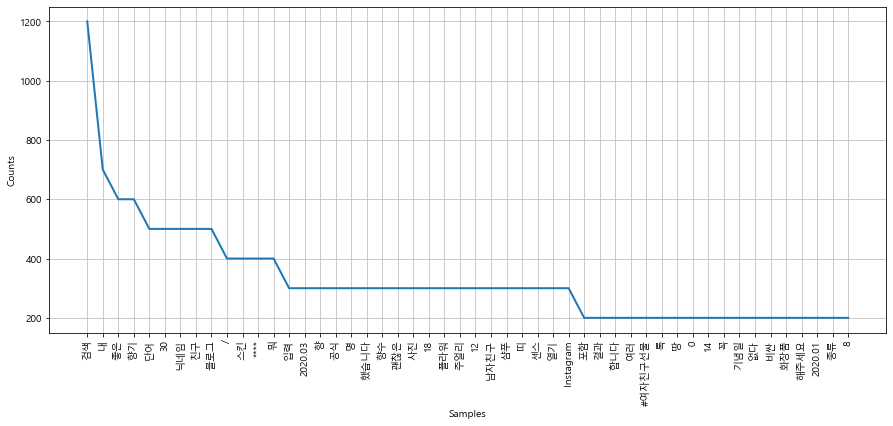

In [114]:
plt.figure( figsize=(15, 6) )

ko.plot(50)
plt.show()

In [116]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from wordcloud import ImageColorGenerator

In [117]:
data = ko.vocab().most_common(300)

In [120]:
wordcloud = WordCloud(
    font_path= "c:/Windows/Fonts/malgun.ttf",
    relative_scaling=0.2,

    #stopwords=stop_words,
    background_color='white',
    ).generate_from_frequencies( dict(data) )

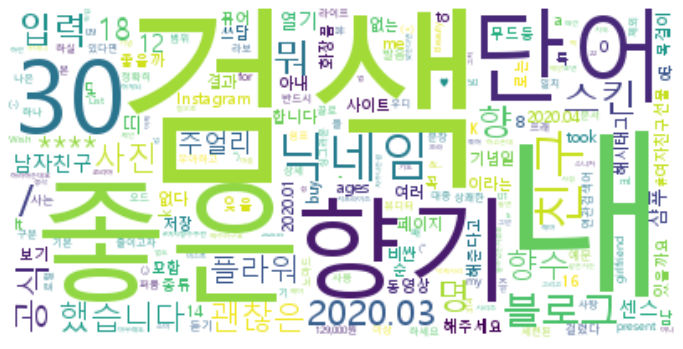

In [121]:
plt.figure( figsize=(12, 12) )
plt.imshow(
    wordcloud, 
    interpolation='bilinear'
)
plt.axis("off")
plt.show()